# Task 4: Exploratory Data Analysis - Terrorism

## Step 1: Import required libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Load the Dataset

In [16]:
terror = pd.read_csv("C:\\Users\\ANTRA RAJPUROHIT\\OneDrive\\Documents\\VS Code\\The Grip TSF\\The-Sparks-Foundation-Tasks\\data\\task4_globalterrorism.csv", encoding='latin1')
terror.head(10)

C:\Users\ANTRA RAJPUROHIT\AppData\Local\Temp\ipykernel_23120\827007178.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv("C:\\Users\\ANTRA RAJPUROHIT\\OneDrive\\Documents\\VS Code\\The Grip TSF\\The-Sparks-Foundation-Tasks\\data\\task4_globalterrorism.csv", encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


## Step 3: Select Relevant columns for analysis and update the 'terror' dataframe

In [17]:
columns = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude',
           'attacktype1_txt', 'nkill', 'nwound', 'gname']
terror = terror[columns]

## Step 4: Rename the columns in the dataframe for Better Readability

In [18]:
column_names = ['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'Latitude', 'Longitude',
                'AttackType', 'Killed', 'Wounded', 'Group']
terror.columns = column_names

## Step 5: Handle missing values

In [19]:
terror['Killed'] = terror['Killed'].fillna(0)
terror['Wounded'] = terror['Wounded'].fillna(0)

Handle missing values by replacing NaN values in the 'Killed' and 'Wounded' columns with '0'.

## Step 6: Data Exploration and Visualization

### Hot Zone of Terrorism by Country

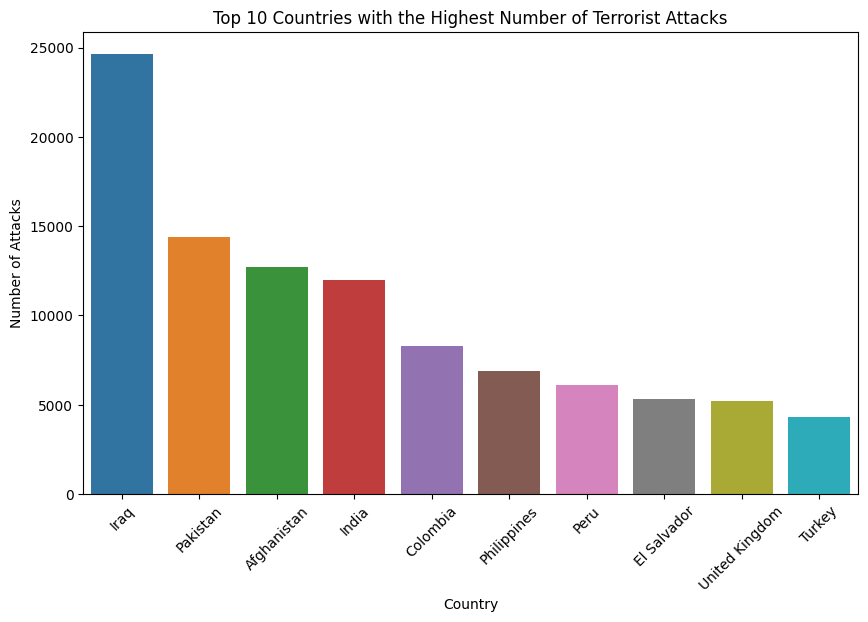

In [20]:
hot_zone = terror['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=hot_zone.index, y=hot_zone.values)
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with the Highest Number of Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()

The visualization showcases the top 10 countries with the highest number of terrorist attacks, helping in identifying hot zones.

### Security Insights and Analysis

#### 1. Distribution of Attacks by Attack Type

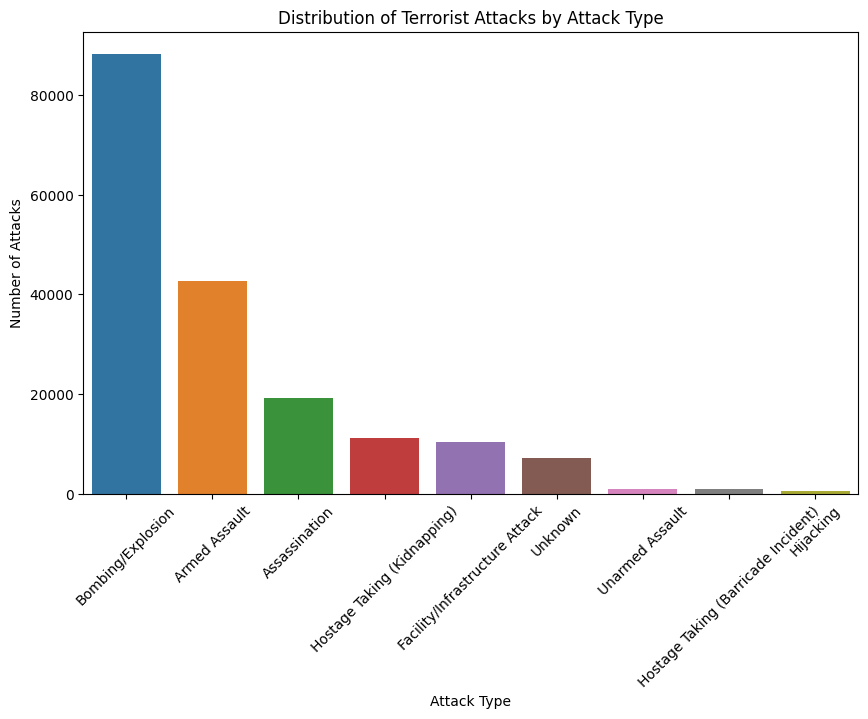

In [21]:
attack_types = terror['AttackType'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_types.index, y=attack_types.values)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Terrorist Attacks by Attack Type')
plt.xticks(rotation=45)
plt.show()

The visualization reveals the distribution of attacks by different attack types, providing an overview of the prevalent methods used by terrorists.

#### 2. Relationship between Number of Killed and Wounded

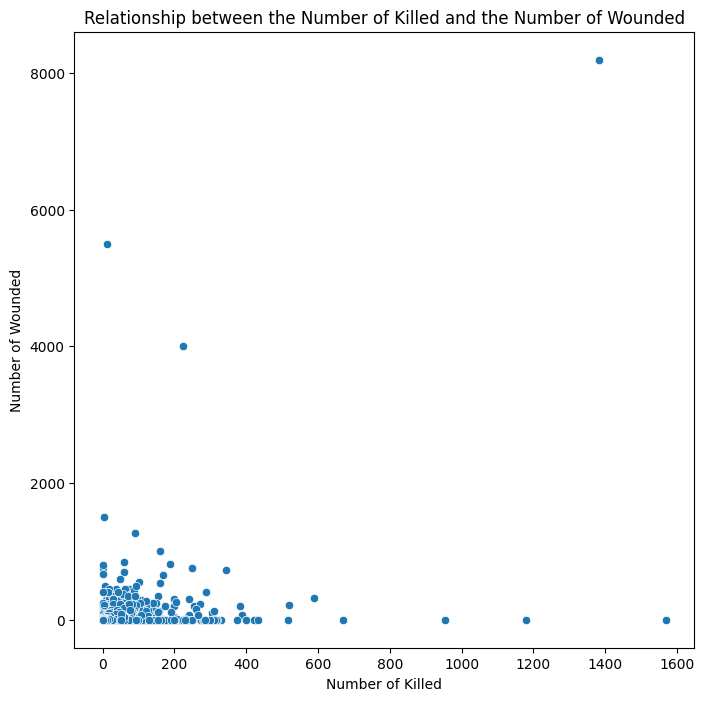

In [22]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Killed', y='Wounded', data=terror)
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.title('Relationship between the Number of Killed and the Number of Wounded')
plt.show()

The visualization reveals the relationship between the number of people killed and wounded, highlighting the severity of attacks.

#### 3. Heatmap of Terrorist Attacks by Year and Region

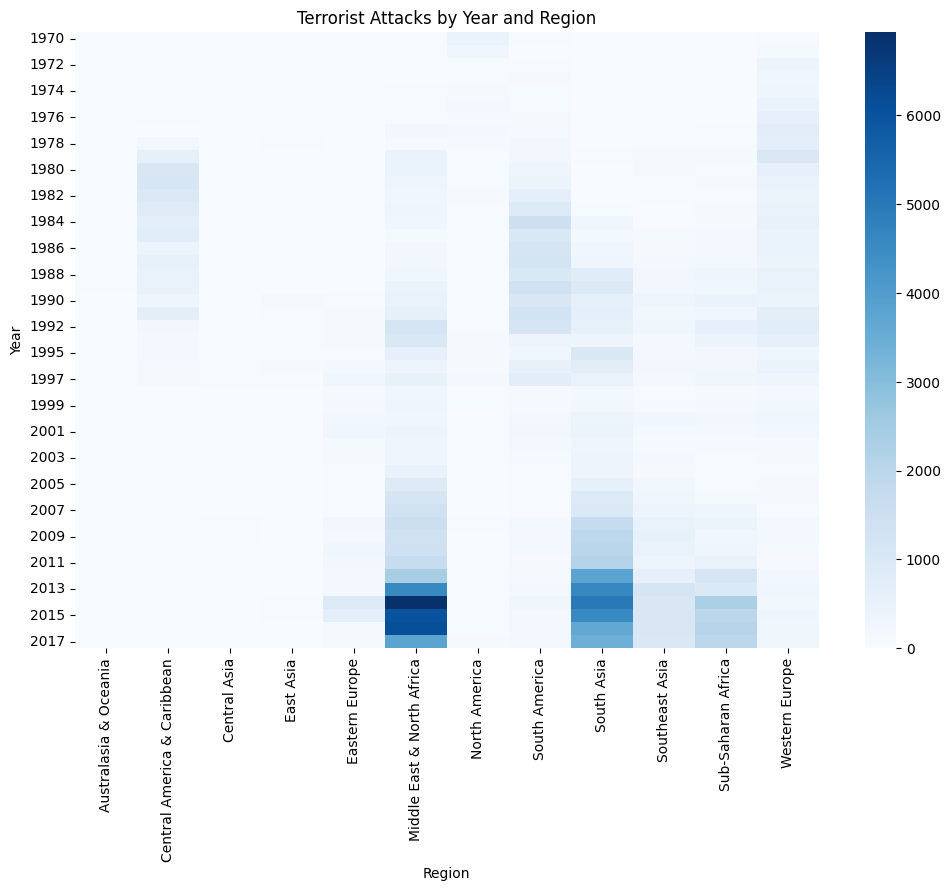

In [23]:
# 3. Heatmap of terrorist attacks by year and region
attacks_by_year_region = pd.crosstab(terror['Year'], terror['Region'])
plt.figure(figsize=(12, 8))
sns.heatmap(attacks_by_year_region, cmap='Blues')
plt.xlabel('Region')
plt.ylabel('Year')
plt.title('Terrorist Attacks by Year and Region')
plt.show()

The heatmap showcases the frequency of terrorist attacks by year and region, assisting in identifying patterns and trends.

#### 4. Group-wise analysis of terrorist attacks

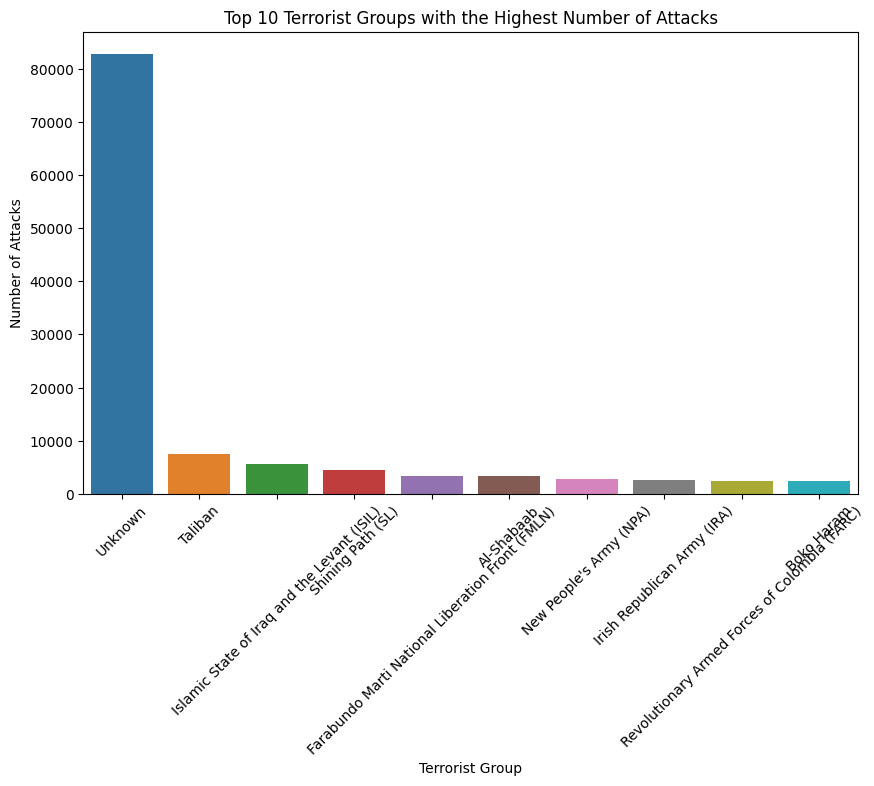

In [24]:
top_groups = terror['Group'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_groups.index, y=top_groups.values)
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Terrorist Groups with the Highest Number of Attacks')
plt.xticks(rotation=45)
plt.show()

The top 10 terrorist groups with the highest number of attacks, enabling a focus on specific threat actors.

#### 5. Security insights and analysis

Number of attacks over the years

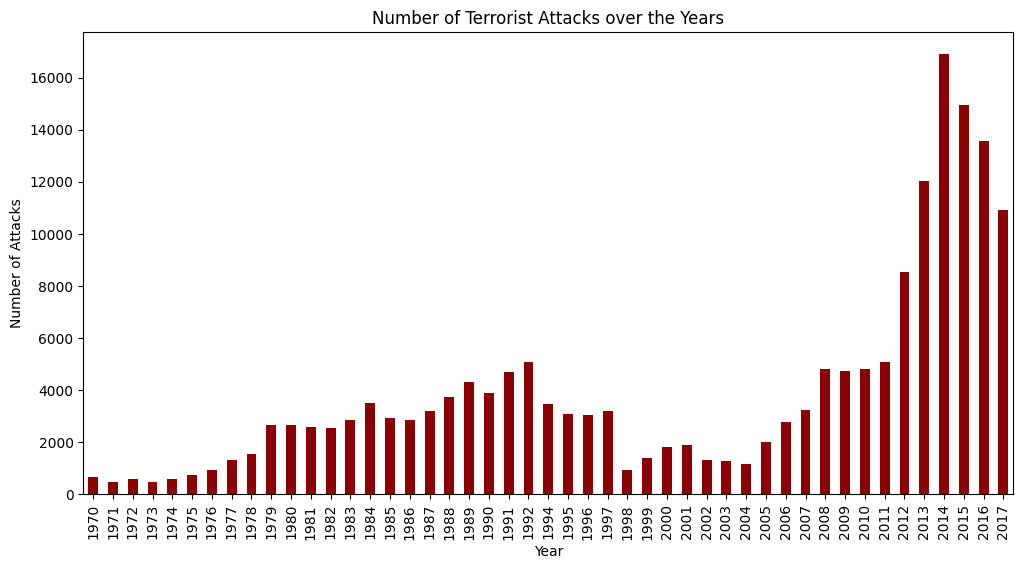

In [25]:
plt.figure(figsize=(12, 6))
terror['Year'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks over the Years')
plt.show()

Casualties over the years

<Figure size 1200x600 with 0 Axes>

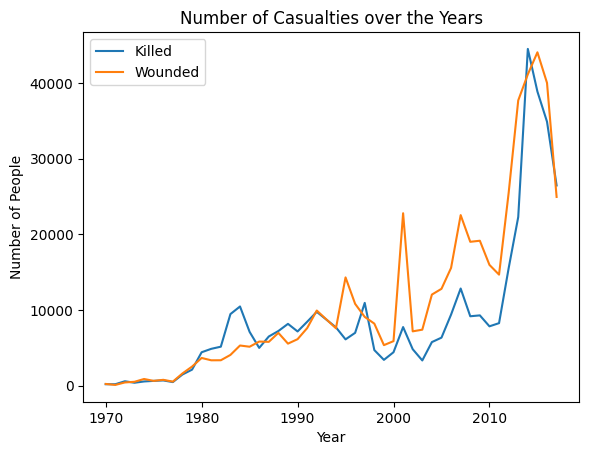

In [26]:
plt.figure(figsize=(12, 6))
terror.groupby('Year')[['Killed', 'Wounded']].sum().plot()
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of Casualties over the Years')
plt.legend()
plt.show()

The number of terrorist attacks and casualties over the years, illustrating the overall trend and impact.

## Step 7: Relationship between Number of attacks and Casualties

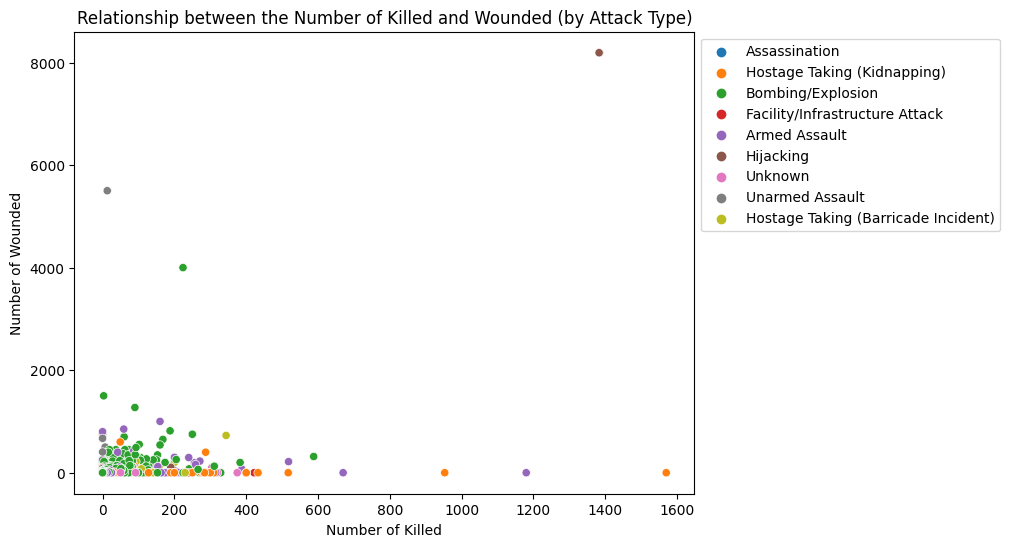

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Killed', y='Wounded', hue='AttackType', data=terror)
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.title('Relationship between the Number of Killed and Wounded (by Attack Type)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The relationship between the number of attacks and casualties based on the attack type, revealing patterns specific to each attack type.

## Conclusion: The code performs EDA on the 'global terrorism' dataset, generating visualizations like bar graphs, scatter plots, and heatmaps. Security/defense analysts can use these insights to understand hot zones of terrorism, patterns, and make informed decisions to combat security threats. These findings aid in developing effective strategies for mitigating and combating terrorism.